### 변수 선택법(Variable Selection) 

        1. 전진 선택법(Forward selection)
        2. 후진 소거법(Backward Elimination)
        3. 단계적선택법(Stepwise Selection)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
import os

In [3]:
os.listdir('data')

['ToyotaCorolla.csv']

In [4]:
data = pd.read_csv('data/ToyotaCorolla.csv')
display(data.head(3))

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0


In [5]:
print(data.shape)
data.info()

(1436, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr

In [6]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

**범주형 변수를 이진형 변수로 변환**

In [7]:
# 가변수 생성 (col 개수와 같은 ndarray 형태의 0 데이터 변수 생성)
# 위의 Fuel_Type (Diesel, Petrol, CNB) 를 이진형 변수로 만들어 주기 위함

dummy_p = np.repeat(0,data.shape[0])
dummy_c = np.repeat(0,data.shape[0])
dummy_d = np.repeat(0,data.shape[0])

dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
# boolean 인덱싱을 통해 boolean index 행렬 생성

p_idx = np.array(data['Fuel_Type'] == "Petrol")
d_idx = np.array(data['Fuel_Type'] == "Diesel")
c_idx = np.array(data['Fuel_Type'] == "CNG")

print(p_idx)
print(d_idx)
print(c_idx)

[False False False ...  True  True  True]
[ True  True  True ... False False False]
[False False False ... False False False]


In [9]:
# boolean index 행렬을 사용하여 가변수에 대입 ( True = 1, False = 0 )

dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

print(dummy_p)
print(dummy_d)
print(dummy_c)

[0 0 0 ... 1 1 1]
[1 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]


**불필요한 변수를 제거하고 가변수를 붙여줌**

    - 현재 데이터 셋에는 37개의 column 존재
    - model의 이름이나, id 같은 column은 가격에 영향을 미치는 것이 아니라 삭제함
    - 새로 생성한 이진형 가변수가 들어가므로 기존의 범주형(Fuel_Type) 또한 삭제

In [10]:
# 행렬로 존재하는 가변수 -> 데이터프레임으로 전환

Fuel = pd.DataFrame({"Petrol" : dummy_p, "Diesel" : dummy_d, "CNG" : dummy_c})
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [11]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [12]:
# 불필요한 변수 삭제 및 가변수 붙이기

data_ = data.drop(["Id","Model","Fuel_Type"],axis = 1, inplace = False)
mlr_data = pd.concat((data_,Fuel),1)
mlr_data.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_29080\3637533131.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  mlr_data = pd.concat((data_,Fuel),1)


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


**설명변수(X)와 타겟변수(Y)를 분리 : 학습데이터와 평가데이터를 분할**

In [52]:
mlr_data = sm.add_constant(mlr_data, has_constant = "add")
mlr_data

,const,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,1.0,13500,23,10,2002,46986,90,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1.0,1.0,13750,23,10,2002,72937,90,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1.0,1.0,13950,24,9,2002,41711,90,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1.0,1.0,14950,26,7,2002,48000,90,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1.0,1.0,13750,30,3,2002,38500,90,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,1.0,7500,69,12,1998,20544,86,1,0,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,1.0,10845,72,9,1998,19000,86,0,0,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,1.0,8500,71,10,1998,17016,86,0,0,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,1.0,7250,70,11,1998,16916,86,1,0,...,0,0,0,1,0,0,0,1,0,0


In [53]:
feature_columns = mlr_data.columns.difference(["Price"]) # Target column 빼기

X = mlr_data[feature_columns]
y = mlr_data['Price']

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 38) (431, 38) (1005,) (431,)


In [54]:
X.columns

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const',
       'const'],
      dtype='object')

In [40]:
# train & 회귀모델 적합

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     283.5
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:24:30   Log-Likelihood:                -8452.6
No. Observations:                1005   AIC:                         1.697e+04
Df Residuals:                     971   BIC:                         1.714e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -234.9091    137.271     -1.711      0.087    -504.291      34.473
Age_08_04         -114.5622      4.195    -27.312      0.000    -122.794    -106.331
Airbag_1            35.3135    257.372      0.137      0.891    -469.757     540.384
Airbag_2          -111.3267    142.190     -0.783      0.434    -390.362     167.708
Airco              235.0214     94.205      2.495      0.013      50.153     419.890
Automatic          370.9328    173.184      2.142      0.032      31.075     710.791
Automatic_airco   2743.5854    210.778     13.016      0.000    2329.952    3157.218
BOVAG_Guarantee    528.3316    136.596      3.868      0.000     260.274     796.389
Backseat_Divider  -403.0913    139.434     -2.891      0.004    -676.719    -129.464
Boardcomputer     -235.7758    126.113     -1.870      0.062    -483.260      11.709
CD_Player          301.6965    107.778      2.799      0.005      90.191     513.202
CNG              -1139.2737    237.885     -4.789      0.000   -1606.102    -672.446
Central_Lock       -19.9549    150.696     -0.132      0.895    -315.682     275.772
Cylinders           -0.0324      0.002    -13.862      0.000      -0.037      -0.028
Diesel            -108.1320    190.701     -0.567      0.571    -482.365     266.101
Doors               54.1411     42.170      1.284      0.199     -28.613     136.895
Gears              181.4674    215.189      0.843      0.399    -240.821     603.756
Guarantee_Period    63.9359     14.549      4.394      0.000      35.384      92.488
HP                  18.7271      3.659      5.118      0.000      11.547      25.907
KM                  -0.0171      0.001    -12.404      0.000      -0.020      -0.014
Met_Color          -57.1003     80.659     -0.708      0.479    -215.386     101.186
Metallic_Rim       183.1306     99.957      1.832      0.067     -13.025     379.287
Mfg_Month          -96.0773     10.667     -9.007      0.000    -117.011     -75.144
Mfg_Year             1.2952      0.841      1.540      0.124      -0.355       2.945
Mfr_Guarantee      141.2651     78.025      1.811      0.071     -11.851     294.381
Mistlamps           17.0924    114.429      0.149      0.881    -207.464     241.649
Petrol            1247.3976    202.473      6.161      0.000     850.063    1644.733
Power_Steering     -17.9919    294.359     -0.061      0.951    -595.645     559.661
Powered_Windows    329.1702    152.514      2.158      0.031      29.876     628.465
Quarterly_Tax       17.9612      1.995      9.003      0.000      14.046      21.876
Radio             1406.6594    801.883      1.754      0.080    -166.964    2980.283
Radio_cassette   -1439.3605    799.987     -1.799      0.072   -3009.264     130.542
Sport_Model        343.7364     92.543      3.714      0.000     162.129     525.343
Tow_Bar           -181.

    - R-squared = 0.903
    - 위 처럼 변수가 많을 경우, 변수 하나하나에 대한 신뢰도가 떨어짐
    - Notes 에서 보면 강한 다중 공선성이 있을 수 있음
    - VIF를 통해 다중공선성 확인

In [41]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


    - 위의 OLS와 VIF 검정시 p-value가 유의하고 VIF 값이 매우 높아도 논리적으로 중요한 변수라고 생각하면 변수를 지우지 않고 살릴 필요가 있음
    - 이러한 과정을 통해 중요하지 않은 변수 중 P-value가 높고 VIF값이 높은 변수를 선택해서 제거함

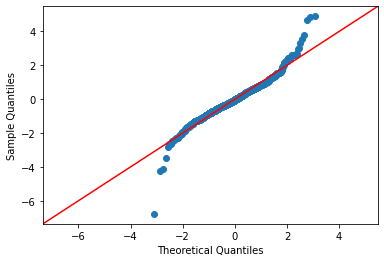

In [42]:
# 학습데이터의 잔차 확인

res = fitted_full_model.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

    - q-q plot은 잔차의 정규성을 확인할 때 쓰는 그래프(statsmodels.api 라이브러리 내에 존재)
    - q-q plot은 y=x 형태를 띄어야 정규성을 보임
    - 위의 그래프는 잔차가 완전한 정규성을 띄지 않음 (실제 데이터에서는 잔차가 완전한 정규성을 띄는 것을 확인하기 어려움)
    : 여기서는 꼬리 부분의 약간의 데이터를 제외하고 정규성이 존재한다고 판단했음 

Text(0, 0.5, 'Residual')

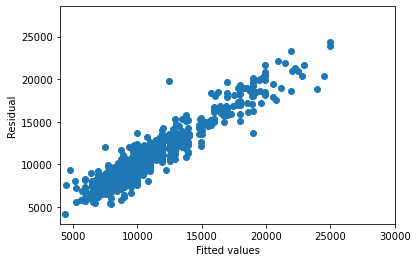

In [44]:
import matplotlib.pyplot as plt 

# 잔차패턴 확인

pred_y = fitted_full_model.predict(train_x)

plt.scatter(train_y, pred_y)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')


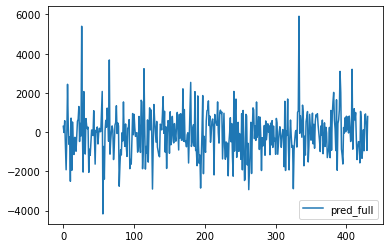

In [45]:
# 검증데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_x)

# 예측데이터 잔차

plt.plot(np.array(test_y - pred_y2), label = "pred_full")
plt.legend()
plt.show()


In [46]:
#MSE 구하기

from sklearn.metrics import mean_squared_error

mean_squared_error(y_true = test_y, y_pred = pred_y2)

1302783.2689491734

## 0. 변수선택법(전체 경우의 수 찾기)

https://todayisbetterthanyesterday.tistory.com/10

In [55]:
# 모델의 AIC를 구함(AIC가 낮을 수록 좋은 모형이라고 평가)

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

In [56]:
feature_columns[0:5]

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco'], dtype='object')

In [57]:
# 일부 5개 컬럼의 AIC test
print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

# 전체 변수의 AIC test
processSubset(X=train_x, y=train_y, feature_set = feature_columns) 

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000296655A1460>, 'AIC': 19089.82745225081}


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x296655a1e50>,
 'AIC': 17048.149276769185}

In [58]:
train_x.columns

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const',
       'const'],
      dtype='object')

In [59]:
import time
import itertools 

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const']),k) :
        # 각 변수 조합을 고려한 경우의수      
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성    
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장       
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
        
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model

getBest(X=train_x,y=train_y,k=2)

Processed 630 models on 2 predictors in 0.612999439239502 seconds.


model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17529.121117
Name: 211, dtype: object

In [60]:
# 변수 선택에 따른 학습시간과 저장

models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x, y=train_y,k=i)
toc = time.time()
print("Total elapsed time:",(toc-tic),"seconds.")

Processed 36 models on 1 predictors in 0.03000020980834961 seconds.
Processed 630 models on 2 predictors in 0.4996523857116699 seconds.
Processed 7140 models on 3 predictors in 6.113468170166016 seconds.
Total elapsed time: 6.777467727661133 seconds.


In [61]:
# 선택된 변수의 개수(1,2,3)별 가장낮은 AIC를 보유한 모델들이 들어있는 DF

models

,AIC,model
1,17802.23534,<statsmodels.regression.linear_model.Regressio...
2,17529.121117,<statsmodels.regression.linear_model.Regressio...
3,17416.716103,<statsmodels.regression.linear_model.Regressio...


In [62]:
# 가장 AIC가 낮은 3번째 모델의 OLS결과를 출력

models.loc[3,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1874.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:26:15   Log-Likelihood:                -8704.4
No. Observations:                1005   AIC:                         1.742e+04
Df Residuals:                    1001   BIC:                         1.744e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Automatic_airco  3448.6931    215.800     15.981      0.000    3025.222    3872.165
HP                 32.8457      2.990     10.986      0.000      26.979      38.713
Mfg_Year         1771.5973     32.346     54.770      0.000    1708.123    1835.072
const           -1.768e+06   3.23e+04    -54.677      0.000   -1.83e+06    -1.7e+06
const           -1.768e+06   3.23e+04    -54.677      0.000   -1.83e+06    -1.7e+06
==============================================================================
Omnibus:                      178.561   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1696.371
Skew:                           0.506   Prob(JB):                         0.00
Kurtosis:                       9.284   Cond. No.                     3.74e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.88e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
# 모든 변수를 모델링한 것과 비교

print("full model Rsquared:","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC:","{:.5f}".format(fitted_full_model.aic))
print("full model MSE:","{:.5f}".format(fitted_full_model.mse_total))

print("selected model Rsquared:","{:.5f}".format(models.loc[3,"model"].rsquared))
print("selected model AIC:","{:.5f}".format(models.loc[3,"model"].aic))
print("selected model MSE:","{:.5f}".format(models.loc[3,"model"].mse_total))

full model Rsquared: 0.90597
full model AIC: 16973.26005
full model MSE: 12590065.00722
selected model Rsquared: 0.84886
selected model AIC: 17416.71610
selected model MSE: 12926586.52113


## 1. 전진 선택법

In [92]:
### 전진선택법(step=1)

def forward(X,y,predictors):
    
    # 데이터 변수들이 미리정의된 predictors(현재 선택되어있는 변수)에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
        results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model

In [68]:
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1 :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [69]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed  36 models on 1 predictors in 0.03198409080505371
Selected predictors: ['Mfg_Year', 'const', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029664080E20>
Processed  35 models on 2 predictors in 0.03002643585205078
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002966401F3A0>
Processed  34 models on 3 predictors in 0.026027917861938477
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000029663CB5D90>
Processed  33 models on 4 predictors in 0.02802753448486328
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000296641BE820>
Processed  32 models on 5 predictors in 0.02703070640563965
Selected predictors:

In [70]:
Forward_best_model.aic

17031.548955221435

In [71]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     405.3
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:28:23   Log-Likelihood:                -8492.8
No. Observations:                1005   AIC:                         1.703e+04
Df Residuals:                     982   BIC:                         1.714e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1485.8859     50.598     29.366      0.000    1386.593    1585.179
Automatic_airco   2452.2361    193.938     12.644      0.000    2071.655    2832.817
HP                  23.2514      3.488      6.666      0.000      16.406      30.097
Weight               9.1917      1.196      7.683      0.000       6.844      11.540
KM                  -0.0153      0.001    -11.073      0.000      -0.018      -0.013
Powered_Windows    327.6174     91.023      3.599      0.000     148.996     506.239
Quarterly_Tax       12.6005      1.918      6.570      0.000       8.837      16.364
Guarantee_Period    67.0998     14.606      4.594      0.000      38.438      95.761
BOVAG_Guarantee    597.7312    138.231      4.324      0.000     326.468     868.994
Petrol            -4.24e+05   1.44e+04    -29.438      0.000   -4.52e+05   -3.96e+05
Sport_Model        341.4970     90.826      3.760      0.000     163.262     519.732
Tow_Bar           -219.8079     84.559     -2.599      0.009    -385.746     -53.870
Backseat_Divider  -331.9995    129.517     -2.563      0.011    -586.162     -77.837
Automatic          494.3054    163.727      3.019      0.003     173.010     815.601
Diesel           -4.247e+05   1.44e+04    -29.502      0.000   -4.53e+05   -3.96e+05
Mfr_Guarantee      211.6729     78.976      2.680      0.007      56.693     366.653
Metallic_Rim       187.1339     96.701      1.935      0.053      -2.630     376.898
ABS               -285.3007    108.654     -2.626      0.009    -498.521     -72.081
Boardcomputer     -302.7983    129.699     -2.335      0.020    -557.317     -48.279
Mfg_Month           20.7641     11.462      1.812      0.070      -1.728      43.256
Airco              150.7796     94.053      1.603      0.109     -33.788     335.348
Radio             -181.6512    114.193     -1.591      0.112    -405.742      42.439
CNG              -4.261e+05   1.44e+04    -29.507      0.000   -4.54e+05   -3.98e+05
const            -1.275e+06   4.32e+04    -29.487      0.000   -1.36e+06   -1.19e+06
const            -1.275e+06   4.32e+04    -29.487      0.000   -1.36e+06   -1.19e+06
==============================================================================
Omnibus:                      105.181   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.459
Skew:                           0.188   Prob(JB):                    1.93e-150
Kurtosis:                       7.040   Cond. No.                     4.82e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.58e-33. This might indicate that there are
strong multicollinearity problems or that the design 

## 2. 후진 소거법

In [72]:
import time

In [73]:
### 후진소거법(step=1)

def backward(X,y,predictors):
    
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
    return best_model

In [78]:
def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
            break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])

In [79]:
Backward_best_model = backward_model(X=train_x, y= train_y)

Processed  36 models on 35 predictors in 0.20060324668884277
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002966873E880>
Processed  35 models on 34 predictors in 0.18400049209594727
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mf

In [81]:
Backward_best_model.aic

17031.548955221475

In [82]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     405.3
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:29:24   Log-Likelihood:                -8492.8
No. Observations:                1005   AIC:                         1.703e+04
Df Residuals:                     982   BIC:                         1.714e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -285.3007    108.654     -2.626      0.009    -498.521     -72.081
Age_08_04          -20.7641     11.462     -1.812      0.070     -43.256       1.728
Airco              150.7796     94.053      1.603      0.109     -33.788     335.348
Automatic          494.3054    163.727      3.019      0.003     173.010     815.601
Automatic_airco   2452.2361    193.938     12.644      0.000    2071.655    2832.817
BOVAG_Guarantee    597.7312    138.231      4.324      0.000     326.468     868.994
Backseat_Divider  -331.9995    129.517     -2.563      0.011    -586.162     -77.837
Boardcomputer     -302.7983    129.699     -2.335      0.020    -557.317     -48.279
CNG              -2147.5287    484.336     -4.434      0.000   -3097.981   -1197.076
Cylinders        -5.498e+05   6.06e+04     -9.071      0.000   -6.69e+05   -4.31e+05
Diesel            -777.6384    301.691     -2.578      0.010   -1369.672    -185.605
Guarantee_Period    67.0998     14.606      4.594      0.000      38.438      95.761
HP                  23.2514      3.488      6.666      0.000      16.406      30.097
KM                  -0.0153      0.001    -11.073      0.000      -0.018      -0.013
Metallic_Rim       187.1339     96.701      1.935      0.053      -2.630     376.898
Mfg_Year          1236.7173    136.173      9.082      0.000     969.493    1503.941
Mfr_Guarantee      211.6729     78.976      2.680      0.007      56.693     366.653
Powered_Windows    327.6174     91.023      3.599      0.000     148.996     506.239
Quarterly_Tax       12.6005      1.918      6.570      0.000       8.837      16.364
Radio             -181.6512    114.193     -1.591      0.112    -405.742      42.439
Sport_Model        341.4970     90.826      3.760      0.000     163.262     519.732
Tow_Bar           -219.8079     84.559     -2.599      0.009    -385.746     -53.870
Weight               9.1917      1.196      7.683      0.000       6.844      11.540
const            -1.374e+05   1.52e+04     -9.071      0.000   -1.67e+05   -1.08e+05
const            -1.374e+05   1.52e+04     -9.071      0.000   -1.67e+05   -1.08e+05
==============================================================================
Omnibus:                      105.181   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.459
Skew:                           0.188   Prob(JB):                    1.93e-150
Kurtosis:                       7.040   Cond. No.                     2.53e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.33e-31. This might indicate that there are
strong multicollinearity problems or that the design 

## 3. 단계적선택법

In [85]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

In [88]:
Stepwise_best_model = Stepwise_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.032996177673339844
Selected predictors: ['Mfg_Year', 'const', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000296654FF790>
forward


KeyError: 1